In [1]:
# Нахождение вероятностей СМО. Работа мат.модели 
import scipy
import numpy as np
from numpy.linalg import matrix_rank
from scipy.linalg import solve
import matplotlib.pyplot as plt
import math
import random
import time
greek_letterz=[chr(code) for code in range(945,970)] 
start_time = time.time()    # Для подсчета времени работы программы
def LI_vecs(dim,M):         # Функция, которая удаляет линейно зависимые строки матрицы     
    LI=[M[0]]
    for i in range(dim):
        tmp=[]
        for r in LI:
            tmp.append(r)
        tmp.append(M[i])                
        if matrix_rank(tmp)>len(LI):    
            LI.append(M[i])            
    return LI                           
                          
def P_i(m,n,lamb,nu,ta):                    # Поиск вероятностей
    A=np.zeros(((n+1)*(m+1),(n+1)*(m+1)))   #  Создаем матрицу коэффициентов
    A[0][m+2]=ta
    A[0][0]=-(lamb+nu)
    
    A[1][m-1]=nu
    A[1][m]=-lamb
    
    A[2][(n-1)*m+n-1]=lamb
    A[2][n*m+n]=-nu
    
    A[3][n*m+n+m-1]=nu
    A[3][(n-1)*m+n+m-1]=lamb
    A[3][n*m+n+m]=-ta
    
    for i in range(1,m):
        A[i+3][m+i+1+1]=ta
        A[i+3][i-1]=nu
        A[i+3][i]=-(lamb+nu)
        
        A[m+2+i][n*m+n+i-1]=nu
        A[m+2+i][(n-1)*m+n-1+i]=lamb
        A[m+2+i][n*m+n+i]=-(ta+nu)
        
    for i in range(1,n):
        A[2*m+1+i][(i-1)*m+i-1]=lamb
        A[2*m+1+i][(i+1)*m+i+1+1]=ta
        A[2*m+1+i][i*m+i]=-(lamb+nu)
        
        A[2*m+n+i][(i-1)*m+m+i-1]=lamb
        A[2*m+n+i][i*m+m+i-1]=nu
        A[2*m+n+i][i*m+m+i]=-(ta+lamb)
        
    k=1
    for i in range(1,n):
        for j in range(1,m):    
            A[2*m+2*n+k-1][(i-1)*m+i-1+j]=lamb
            A[2*m+2*n+k-1][i*m+i-1+j]=nu
            A[2*m+2*n+k-1][(i+1)*m++i+j+2]=ta
            A[2*m+2*n+k-1][i*m+i+j]=-(nu+ta+lamb)
            k+=1
    A=LI_vecs((m+1)*(n+1),A)              # Оставляем в матрице коофициентов только лин.независимые
    a=np.ones((1,(n+1)*(m+1)))            # Создаем вектор единиц (усл. нормировки)  
    A=np.vstack((A,a))                    # Добавляемв матрицу коэффициентов  

    b=np.zeros(((n+1)*(m+1),1))           # Вектор b из нулей
    b[(n+1)*(m+1)-1]=1                    # Единица, где было усл. нормировки    
    Pi=solve(A,b)                         # Решение система AX=b. Непосредственно находим вероятности
    return Pi

lamb = 6   # интенсивность покупателей
nu = 6     # интенсивность прихода вещи на склад
eta = 3    # интенсивность обслуживания   
n = 10     # длина очереди
p = 900    # прибыль с продажи
c = 50     # затраты на хранение одной единицы продукции
q = 300    #  штраф за переполнение склада
F=10       # содержание склада
def Pribl(m,n,lamb,nu,eta):    # расчет средней прибыли
    Pi = P_i(m,n,lamb,nu,eta)
    summa = 0
    summa1 = 0
    summa2 = 0
    summa3 = 0
    summa4 = 0
    for j in range(1,m+1):
        summa4+=Pi[j]
    for i in range(0,n+1):
        summa1+=Pi[i*m+i+m]
        if i>0:
            summa3+= Pi[i*m+i]
        for j in range(1,m+1):
            summa2+=Pi[i*m+j+i]*j
            if i>0:
                summa+=Pi[i*m+j+i]
    if eta<= min(lamb,nu):
        H = min(lamb,nu,eta)*p*summa-nu*q*summa1-c*summa2- F*m
    else:
        H = min(lamb,nu,eta)*p*summa + min(nu,eta)*p*summa3 + min(lamb,eta)*p*summa4 -nu*q*summa1-c*summa2- F*m   

    return float(H)
# Y=[]
# m= list(range(1,20)) 
# eta = list(range(1,11))
# Y_anima=np.zeros((10,19))
# print()
# for j in eta:
#     for i in m:
#         Y.append(Pribl(i,n,lamb,nu,j))
#     Y_anima[j-1,:]=Y
#     Y.clear() 
Y=[]
m= list(range(1,20)) 
for i in m:
    Y.append(Pribl(i,n,lamb,nu,eta)) 
max1=np.argmax(Y)+1
print("Y=",Y)
print("max = ", np.argmax(Y)+1)
print("Максимальная средняя прибыль = ", max(Y))
print("время работы",  time.time()- start_time )

Y= [556.6662933217818, 1194.2490366836782, 1416.4722474741368, 1485.3579941863127, 1487.364096292661, 1457.8984919070642, 1413.0816035548228, 1360.6520961569067, 1304.4233150245161, 1246.2968256030022, 1187.2245089460725, 1127.6824165591306, 1067.907829253098, 1008.0185455793398, 948.0728292675872, 888.0994066194971, 828.1124043468571, 768.118755280687, 708.1218562732054]
max =  5
Максимальная средняя прибыль =  1487.364096292661
время работы 5.292280912399292


In [4]:
# Задача с размером склада. Имитация
import random
import numpy as np
import math
start_time = time.time()                 # Для подсчета времени работы программы
def H_m(M,N,lamb,nu,ta,q,p,c, F,Time):   # Имитация
    H=0        # прибыль
    m=[]       # вектор для вещей на складе
    n=[]       # вектор для людей в очереди
    queqe=0    # Количество людей в очереди 
    tovar=0    # Сколько всего продано товара
    people=0   # Сколько клиентов ушло
    vozvrat=0  # Сколько произошло отказов от товара
    times=[]   # вектор хранящий время и ти п заявки
    times.append((1,0+random.expovariate(lamb)))   # моделируем первое время прихда товара
    times.append((-1,0+random.expovariate(nu)))    # моделируем первое время прихода покупателя
    times.sort(key=lambda x: x[1])                 # сортируем по возрастанию 
    t=0
    tB=0 # Время оконччания обслуживания
    B=0  # Индикатор занятости прябора 1-занят, 0- свободен
    while times[0][1] <= Time:
        if times[0][1]<tB or B==0:
            H = H-(c*len(m)+M*F)*(times[0][1]-t)
        else:
            while times[0][1]>tB and B==1:
                H = H-(c*len(m)+M*F)*(tB-t)
                t=tB
                B=0
                H+=p
                tovar+=1
                m.pop(0)
                n.pop(0)
                if len(m)>0 and len(n)>0: 
                    t1=random.expovariate(ta)
                    if tB+t1<=Time:
                        tB+=t1
                        B=1
            if times[0][1]<tB:
                H = H-(c*len(m)+M*F)*(times[0][1]-t)
            else:
                H = H-(c*len(m)+M*F)*(times[0][1]-tB)
            
        t=times[0][1]
        if times[0][0] == 1:                            # Поступила заявка "товар"
            if len(m)+1 > M:
                H-=q
                vozvrat+=1
            else: 
                m.append(t)
                if len(n)>0: 
                    if t>tB and B==0:
                        B=1
                        t1=random.expovariate(ta)
                        if t+t1<Time:
                            tB=t+t1
                        else:
                            B=0
            times.append((1,t+random.expovariate(lamb))) # моделируем следующее время прихлда товара
            times.pop(0)
            times.sort(key=lambda x: x[1])
        else:                                           # Поступила заявка "покупатель"
            if len(n)+1<N:
                n.append(t)
                if len(m)>0: 
                    if t>tB and B==0:
                        B=1
                        t1=random.expovariate(ta)
                        if t+t1<Time:
                            tB=t+t1
                        else:
                            B=0
            times.append((-1,t+random.expovariate(nu))) # Моделируем следующее время прихода покупателя
            times.pop(0)
            times.sort(key=lambda x: x[1])
    return H, tovar, people, vozvrat
def out(H,m):
    print("Размер склада = ",m)
    print("Прибыль = ",H[0]/Time)
    print("Количесвто проданного товара = ",H[1])
    print("Количество людей, отказавшихся от товара ",H[2])
    print("Количество возвращенного товара",H[3])
    print("Максимальная очередь",H[4])
    print()
    
def iteration(M,n,N,lamb,nu,ta,q,p,c,f,Time):
    H_sr =[] 
    for i in M:
        H_test = 0
        for j in range(N):
            H_test += H_m(i,n,lamb,nu,ta,q,p,c, f,Time)[0]/Time
        H_sr.append(H_test/N)
    return H_sr 

lamb = 6 # интенсивность прихода вещи на склад
nu = 6
ta = 3
p = 900 # прибыль с продажи
c = 50 # затраты на хранение одной единицы продукции
q = 300 # за переполнение склада
F=10
n=10

m= list(range(1,20))

N=4000
Time=1000
W = iteration(m,n,N,lamb,nu,ta,q,p,c,F,Time)

# m= list(range(1,20))
# W=[]
# for i in m:
#     W.append(H_m(i,n,lamb,nu,ta,q,p,c,F,Time)[0]/Time)

max2=np.argmax(W)+1
print("Максимальная прибыль ",  max(W)) 
print("время работы",  time.time()- start_time )               

Максимальная прибыль  1488.1135904319294
время работы 1339.042712688446


In [ ]:
# Рисунки
print("max = ", np.argmax(Y)+1)
print("Максимальная средняя прибыль = ", max(Y))
print("Имитация max  = ", np.argmax(W)+1)
print("Максимальная средняя прибыль = ", max(W))
fig, ax = plt.subplots() 
ax_1 = fig.add_subplot(4, 4, 14)
ax.plot(m,Y,label='Мат.модель')
ax.plot(m,W,label='Имитация')
ax.plot(max1, Y[max1-1],'ro',label='Максимум мат.модели')
ax.plot(max2, W[max2-1],'+',label='Максимум имитации', color = "blue")
ax.legend()
x=list(range(max1-1, max1+2))
x1=list(range(max2-1, max2+2))
y=[Y[i-1] for i in x]
y1=[W[i-1] for i in x1]
ax_1.plot(x,y)
ax_1.plot(x1,y1)
ax_1.plot(max1, Y[max1-1],'ro',label='Максимум мат.модели')
ax_1.plot(max2, W[max2-1],'+',label='Максимум имитации', color = "blue")
ax.set_xlabel("m")                             
ax.set_ylabel("Прибыль")                         
ax.set_title("Средняя прибыль")
plt.show() 

max =  5
Максимальная средняя прибыль =  1487.364096292661
Имитация max  =  5
Максимальная средняя прибыль =  1488.1135904319294


In [18]:
# ДЛя создания анимации
lamb =6     # интенсивность прихода вещи на склад
nu = 6      # интенсивность прихода покупателя
ta = 3      # интенсивность обслуживания
Time=1000 # Время работы имитации
p = 900     # прибыль с продажи
c = 50      # затраты на хранение одной единицы продукции
q = 300     # за переполнение склада
F=10        # затраты на содержание
n=10        # длина очереди
m= list(range(1,20))
eta = list(range(1,7))
W1=[]
Y1=[]
Y_anima=np.zeros((len(eta),len(m)))
W_anima=np.zeros((len(eta),len(m)))
for j in eta:
    for i in m:
        W1.append(H_m(i,n,lamb,nu,j,q,p,c,F,Time)[0]/Time)
        Y1.append(Pribl(i,n,lamb,nu,j))
    W_anima[j-1,:]=W1
    Y_anima[j-1,:]=Y1
    Y1.clear() 
    W1.clear() 

MovieWriter imagemagick unavailable; using Pillow instead.


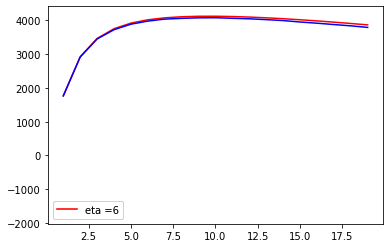

In [20]:
# Создание анимации
from celluloid import Camera
 
fig = plt.figure()
camera = Camera(fig)
for i in range(len(eta)):
    t=plt.plot(m,Y_anima[i,:],label='Мат.модель', color = "red")
    plt.plot(m,W_anima[i,:],label='Имитация', color = "blue")
    plt.legend(t, [f'eta ={i+1}'])
    camera.snap()
animation = camera.animate()
animation.save('eta.gif', writer = 'imagemagick')

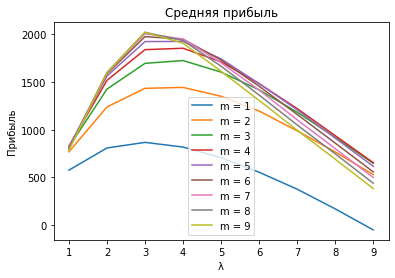

Оптимальные прибыль, размер склада, интенсивность покупателей =  (2021.4548101879323, 9, 3)
время работы 1982.4862930774689


In [11]:
# Рисунок для известной интенсивности покупателей  

nu = 6      # интенсивность прихода покупателя
ta = 3      # интенсивность обслуживания
Time=400000 # Время работы имитации
p = 900     # прибыль с продажи
c = 50      # затраты на хранение одной единицы продукции
q = 300     # за переполнение склада
F=10        # затраты на содержание
n=10        # длина очереди
m= list(range(1,10))
lamb = list(range(1,10))
fig, ax = plt.subplots() 
RS=[]
for i in m:
    R1=[]
    for j in lamb:
        R1.append((H_m(i,n,j,nu,ta,q,p,c,F,Time)[0]/Time,i,j)) 
#        max2=np.argmax(R)+4
    ax.plot(lamb,[R1[i][0] for i in range(len(lamb))], label='m = ' +str(i))
    RS.extend(R1)
ax.set_xlabel(greek_letterz[10])                             
ax.set_ylabel("Прибыль")                         
ax.set_title("Средняя прибыль")
plt.legend()
plt.show() 
print("Оптимальные прибыль, размер склада, интенсивность покупателей = ", max(RS, key=lambda x: x[0]))
print("время работы",  time.time()- start_time )

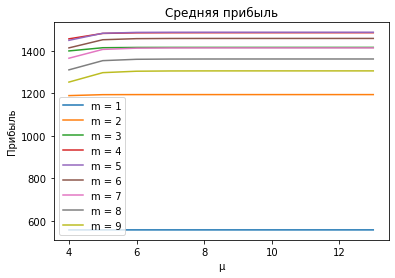

(1488.0951614941036, 5, 13)
время работы 3337.109031677246
[(556.5640261233291, 1, 4), (556.6616904723212, 1, 5), (556.6662933217818, 1, 6), (556.6666277958398, 1, 7), (556.6666614570206, 1, 8), (556.6666658136721, 1, 9), (556.6666665023333, 1, 10), (556.6666666304368, 1, 11), (556.6666666577175, 1, 12), (556.6666666642307, 1, 13), (1189.4880249316952, 2, 4), (1193.9269799279464, 2, 5), (1194.2490366836782, 2, 6), (1194.2808314745082, 2, 7), (1194.2849102985538, 2, 8), (1194.28555701275, 2, 9), (1194.285678832894, 2, 10), (1194.2857052876498, 2, 11), (1194.2857117603087, 2, 12), (1194.2857135129727, 2, 13), (1400.041634127985, 3, 4), (1415.0710637531736, 3, 5), (1416.4722474741368, 3, 6), (1416.6369459171833, 3, 7), (1416.661171731246, 3, 8), (1416.6654778397924, 3, 9), (1416.6663735204595, 3, 10), (1416.6665859645761, 3, 11), (1416.6666422635399, 3, 12), (1416.666658666012, 3, 13), (1457.0050182181978, 4, 4), (1482.5495546899108, 4, 5), (1485.3579941863127, 4, 6), (1485.730738006845, 

In [17]:
# Рисунок для известной интенсивности товара
lamb = 6    # интенсивность прихода вещи на склад
nu = 6      # интенсивность прихода покупателя
eta = 3      # интенсивность обслуживания
p = 900     # прибыль с продажи
c = 50      # затраты на хранение одной единицы продукции
q = 300     # за переполнение склада
F=10        # затраты на содержание
n=10        # длина очереди
m= list(range(1,10))
lamb = list(range(4,14))
fig, ax = plt.subplots() 
RS=[]
for i in m:
    R=[]
    for j in lamb:
        R.append((Pribl(i,n,j,nu,eta),i,j)) 
    ax.plot(lamb,[R[i][0] for i in range(len(lamb))], label='m = ' +str(i))
    RS.extend(R)
ax.set_xlabel(greek_letterz[11])                             
ax.set_ylabel("Прибыль")                         
ax.set_title("Средняя прибыль")
plt.legend()
plt.show() 
print(max(RS, key=lambda x: x[0]))
print("время работы",  time.time()- start_time ) 